In [31]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

# Упражнение 10.1

В разделе «Системы и свертка» на стр. 131 свертка описана как сумма сдвинутых и масштабированных копий сигнала.

А в разделе «Акустическая характеристика» на стр. 128 умножение ДПФ сигнала на передаточную функцию соответствует круговой свертке, но в предположении периодичности сигнала. В результате можно заметить, что на выходе, в начале фрагмента, слышна лишняя нота, «затекшая» из конца этого фрагмента.

К счастью, есть стандартное решение этой проблемы. Если перед вычислением ДПФ добавить достаточно нулей в конец сигнала, эффекта «заворота» можно избежать.

Измените пример в chap10.ipynb и убедитесь, что дополнение нулями устраняет лишнюю ноту в начале фрагмента.

In [32]:
if not os.path.exists('180960__kleeb__gunshot.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/180960__kleeb__gunshot.wav

Impulse Response:

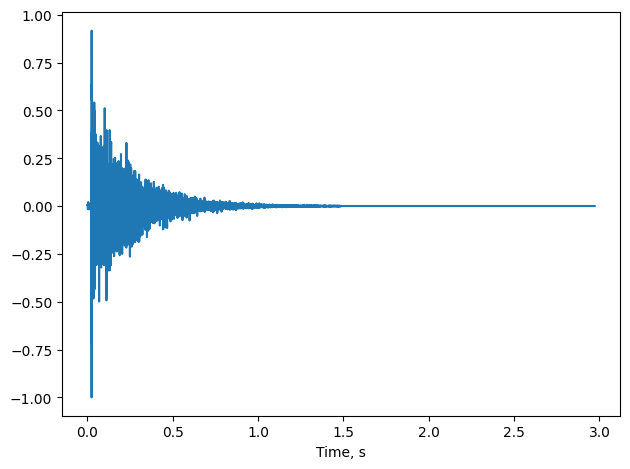

In [33]:
from thinkdsp import read_wave

response = read_wave('180960__kleeb__gunshot.wav')

start = 0.12
response = response.segment(start=start)
response.shift(-start)

response.truncate(2**16)
response.zero_pad(2**17)

response.normalize()
response.plot()
decorate(xlabel='Time, s')

In [34]:
response.make_audio()

Спектр:

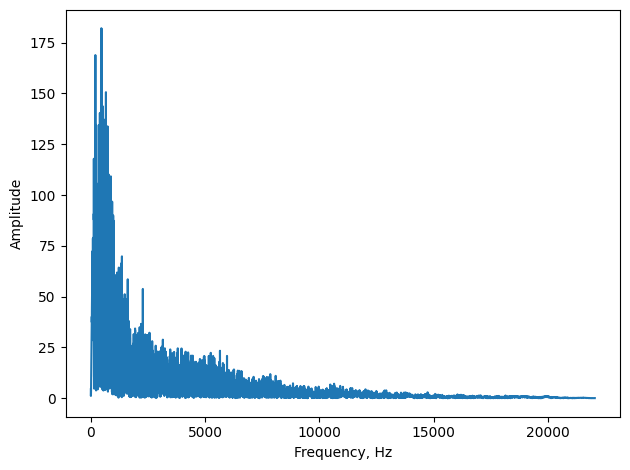

In [35]:
transfer = response.make_spectrum()
transfer.plot()
decorate(xlabel='Frequency, Hz', ylabel='Amplitude')

Исходный сигнал:

In [36]:
if not os.path.exists('92002__jcveliz__violin-origional.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/92002__jcveliz__violin-origional.wav

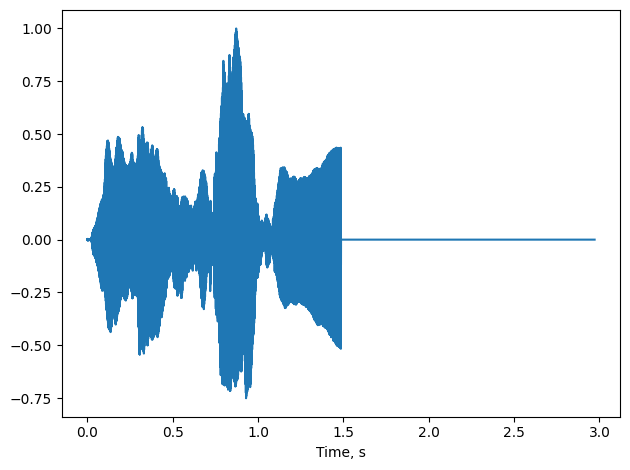

In [37]:
violin = read_wave('92002__jcveliz__violin-origional.wav')

start = 0.11
violin = violin.segment(start=start)
violin.shift(-start)

violin.truncate(2**16)
violin.zero_pad(2**17)

violin.normalize()
violin.plot()
decorate(xlabel='Time, s')

In [38]:
violin.make_audio()

In [39]:
spectrum = violin.make_spectrum()

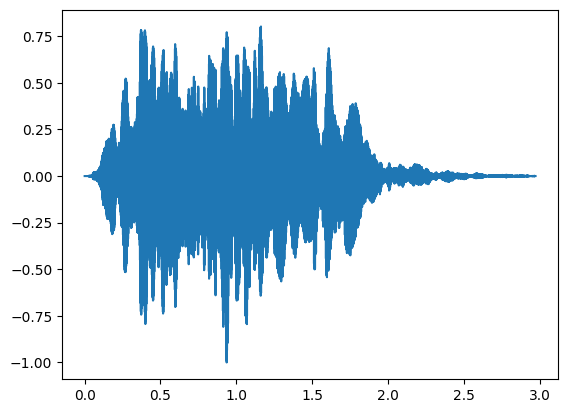

In [40]:
wave = (spectrum * transfer).make_wave()
wave.normalize()
wave.plot()

По форме сигнала не видно "заворота" сигнала.

In [30]:
wave.make_audio()

И на слух он также отстутствует. Добавление нулей действительно помогло.

# Упражнение 10.2

Библиотека Ореп AIR (свободный эфир) — это «централизованный... онлайн-ресурс для тех, кто интересуется аурализацией и данными акустической импульсной характеристики» (http://www.openairlib.net). Просмотрите эту коллекцию импульсных характеристик и скачайте ту, звучание которой интереснее. Найдите короткие записи с той же частотой дискретизации, что и у скачанной импульсной характеристики.

Смоделируйте двумя способами звучание записи в том пространстве, где была измерена импульсная характеристика, как сверткой самой записи с импульсной характеристикой, так и умножением ДПФ записи на вычисленный фильтр, соответствующий импульсной характеристике.

Была взята запись IR из зала ядерного реактора R1

In [65]:
if not os.path.exists('IR.wav'):
    !wget https://github.com/Ch0rtik/telecom/raw/main/chap_10/IR.wav

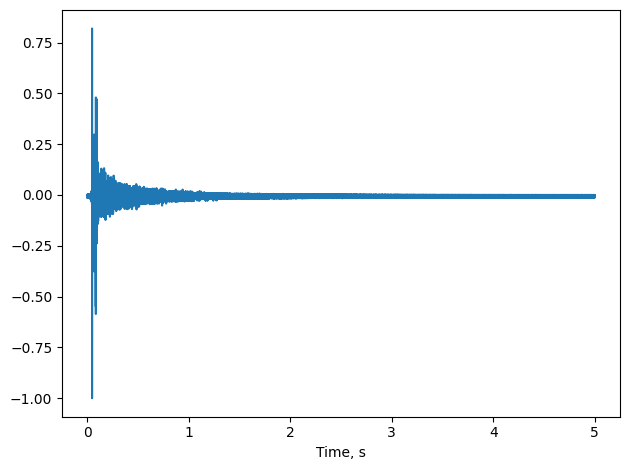

In [66]:
response = read_wave('IR.wav')

start = 0
duration = 5
response = response.segment(duration=duration)
response.shift(-start)

response.normalize()
response.plot()
decorate(xlabel='Time, s')


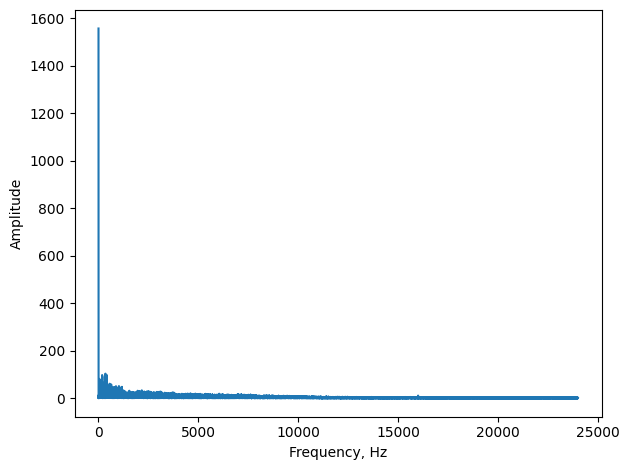

In [67]:
transfer = response.make_spectrum()
transfer.plot()
decorate(xlabel='Frequency, Hz', ylabel='Amplitude')

В качестве сигнала, к которому будет применён IR, был взята та же запись, что и в главе 6.

In [68]:
if not os.path.exists('metro-boomin.wav'):
    !wget https://github.com/Ch0rtik/telecom/raw/main/chap_06/metro-boomin.wav

/content/thinkdsp.py:1113: RuntimeWarning: overflow encountered in scalar absolute
  high, low = abs(max(ys)), abs(min(ys))


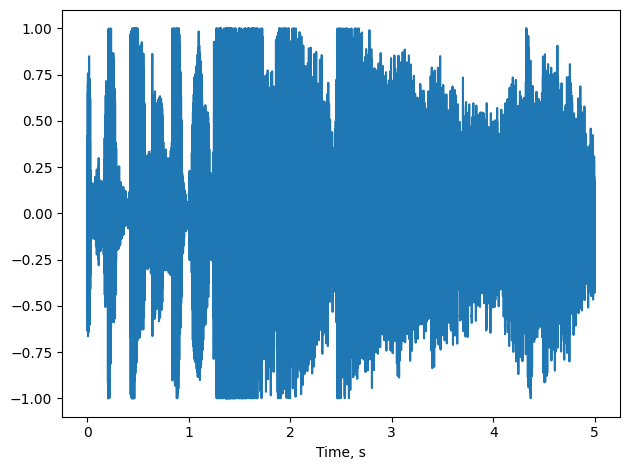

In [69]:
wave = read_wave('metro-boomin.wav')

start = 0.0
wave = wave.segment(start=start)
wave.shift(-start)

wave.truncate(len(response))
wave.normalize()
wave.plot()
decorate(xlabel='Time, s')

In [70]:
wave.make_audio()

In [71]:
spectrum = wave.make_spectrum()

Свёртка:

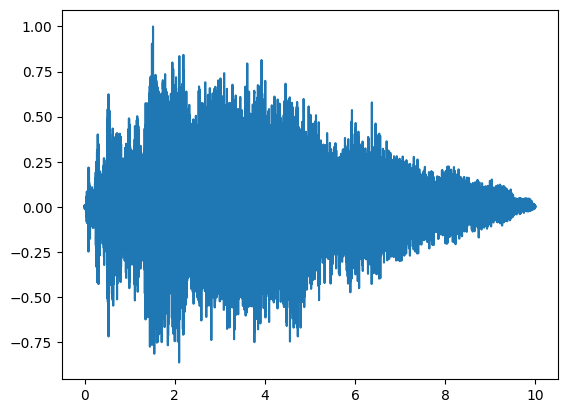

In [75]:
conv = wave.convolve(response)
conv.normalize()
conv.plot()

In [76]:
conv.make_audio()

Умножение ДПФ:

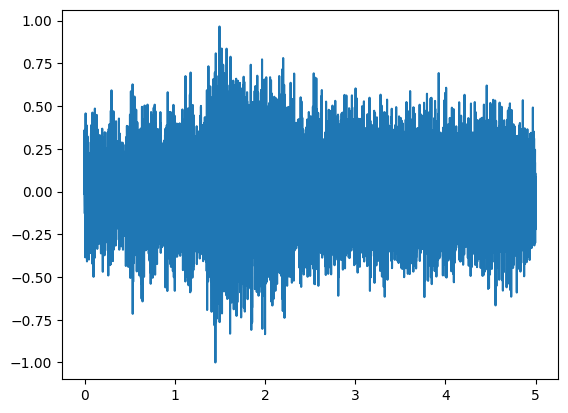

In [77]:
output = (spectrum * transfer).make_wave()
output.normalize()
output.plot()

In [78]:
output.make_audio()